In [81]:
# Class : DSC540-T301 Data Preparation (2237-1)
# Name : Rajib Samanta
# Assignment : Project Milestone 3
## Assignment: Cleaning/Formatting Flat File Source
## Project: Data Exploration on NYPD Arrest Data
## Name: Rajib Samanta
#*** As the original data source : https://maps2.dcgis.dc.gov/dcgis/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/WMSServer?request=GetCapabilities&service=WMS
#        is not in html format, I didnt find any html data source for 'Marijuana Arrests(D.C)''
#        Changing the data similar arrest data source *** 
        
        
# Overview 
## This is a breakdown of every arrest effected in NYC by the NYPD during the current year.
## This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning.
## Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.


In [82]:
import requests
from bs4 import BeautifulSoup
import urllib.request
from urllib.request import urlopen
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [83]:

# URL of the web page
url = "https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc"
# Send a GET request to the URL
#response = requests.get(url)


# Send a GET request to the URL
response = requests.get(url)
#print(response.text)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
containers = soup.findAll("div", { "class": "ui celled sortable table"})
print(len(containers))

table_captions = soup.find_all('caption')
print(table_captions)
'''
# Print the page title
title = soup.title.string
print("Page Title:", title)
containers = soup.findAll("section", { "class": "landing-page-section dataset-preview"})
#print(soup)
# Find the div element by its class
div_element = soup.find("div", {"class": "table-contents"})

# Check if the div element is found
if div_element:
    # Extract the data from the div element
    data = div_element.get_text()

    # Print the extracted data
    print(data)
else:
    print("Div element not found.")

# Create a BeautifulSoup object to parse the HTML content
#soup = BeautifulSoup(response.text, "html.parser")
containers = page_soup.findAll("div", { "class": "visualization-content"})
print(len(containers))

# Find the table element by its class or other identifiers
table = soup.find("table", {"class": "socrata-table frozen-columns"})

# Check if the table is found
if table:
    # Extract the table headers
    headers = [header.text.strip() for header in table.find_all("th")]

    # Extract the table rows
    rows = []
    for row in table.find_all("tr"):
        rows.append([cell.text.strip() for cell in row.find_all("td")])

    # Print the table headers
    print("Headers:")
    print(headers)

    # Print the table rows
    print("Rows:")
    for row in rows:
        print(row)
else:
    print("Table not found.")'''

0
[]


'\n# Print the page title\ntitle = soup.title.string\nprint("Page Title:", title)\ncontainers = soup.findAll("section", { "class": "landing-page-section dataset-preview"})\n#print(soup)\n# Find the div element by its class\ndiv_element = soup.find("div", {"class": "table-contents"})\n\n# Check if the div element is found\nif div_element:\n    # Extract the data from the div element\n    data = div_element.get_text()\n\n    # Print the extracted data\n    print(data)\nelse:\n    print("Div element not found.")\n\n# Create a BeautifulSoup object to parse the HTML content\n#soup = BeautifulSoup(response.text, "html.parser")\ncontainers = page_soup.findAll("div", { "class": "visualization-content"})\nprint(len(containers))\n\n# Find the table element by its class or other identifiers\ntable = soup.find("table", {"class": "socrata-table frozen-columns"})\n\n# Check if the table is found\nif table:\n    # Extract the table headers\n    headers = [header.text.strip() for header in table.find_

In [84]:
# Find the tables
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))
##--> There are 7 tables

Total number of tables are 0 


In [85]:
# **** Due to limited time and job related relocation, I didnt get time to do more research on the above error.
## To complete the assignment redaing the same data as in csv format *** 

In [86]:
import requests
import pandas as pd

# URL of the CSV file
csv_url = "https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv"

# Send a GET request to the CSV URL
response = requests.get(csv_url)

# Save response content to a file
with open("data.csv", "wb") as f:
    f.write(response.content)

print("Response content saved to data.csv")


# Read the CSV file into a pandas DataFrame
df = pd.read_csv("data.csv")

# Print the DataFrame
print(df.head())





Response content saved to data.csv
   ARREST_KEY ARREST_DATE  PD_CD              PD_DESC  KY_CD OFNS_DESC  \
0   263238742  02/08/2023  380.0  ROBBERY,CAR JACKING  105.0   ROBBERY   
1   265590985  03/24/2023  155.0               RAPE 2  104.0      RAPE   
2   265798132  03/28/2023  157.0               RAPE 1  104.0      RAPE   
3   269233687  06/02/2023  157.0               RAPE 1  104.0      RAPE   
4   270519574  06/28/2023  157.0               RAPE 1  104.0      RAPE   

     LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  \
0  PL 1601003          F           K               62                  0   
1  PL 1303001          F           S              120                  0   
2  PL 1303501          F           S              120                  0   
3  PL 1303501          F           Q              110                  0   
4  PL 1303501          F           K               84                  0   

  AGE_GROUP PERP_SEX       PERP_RACE  X_COORD_CD  Y_COORD_CD   

In [87]:
df.shape
# No of rows : 112571 and Number of columns : 19

(112571, 19)

In [88]:
# List all the columns
columns = df.columns.tolist()
# Print the column names
print(columns)

['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column']


In [89]:
# Get information about the DataFrame
data_info = df.info()
# Print the DataFra

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112571 entries, 0 to 112570
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                112571 non-null  int64  
 1   ARREST_DATE               112571 non-null  object 
 2   PD_CD                     112110 non-null  float64
 3   PD_DESC                   112571 non-null  object 
 4   KY_CD                     112105 non-null  float64
 5   OFNS_DESC                 112571 non-null  object 
 6   LAW_CODE                  112571 non-null  object 
 7   LAW_CAT_CD                111725 non-null  object 
 8   ARREST_BORO               112571 non-null  object 
 9   ARREST_PRECINCT           112571 non-null  int64  
 10  JURISDICTION_CODE         112571 non-null  int64  
 11  AGE_GROUP                 112571 non-null  object 
 12  PERP_SEX                  112571 non-null  object 
 13  PERP_RACE                 112571 non-null  o

In [90]:
# Find the missing values of columns
df.isnull().sum() # Sum of null value for each columns
## From the below table we can see PD_CD,KY_CD has missing values for around 450+ records
## We can remove these 450 records a insufficient records or bad data.

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                       461
PD_DESC                       0
KY_CD                       466
OFNS_DESC                     0
LAW_CODE                      0
LAW_CAT_CD                  846
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
dtype: int64

In [91]:
# Remove rows with null values in column CCN,RACE,ETHNICITY & SEX
df = df.dropna(subset=['PD_CD'])
df.shape
## After removing 461 rows now count is 112110, earlier was 112571

(112110, 19)

In [92]:
# data.describe
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263238742,02/08/2023,380.0,"ROBBERY,CAR JACKING",105.0,ROBBERY,PL 1601003,F,K,62,0,25-44,F,WHITE,989904,156928,40.597407,-73.979638,POINT (-73.979638 40.597407)
1,265590985,03/24/2023,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,S,120,0,18-24,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
2,265798132,03/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,0,25-44,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
3,269233687,06/02/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,110,0,25-44,M,WHITE HISPANIC,1019164,210169,40.743481,-73.874004,POINT (-73.8740035373971 40.7434812638841)
4,270519574,06/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK HISPANIC,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)


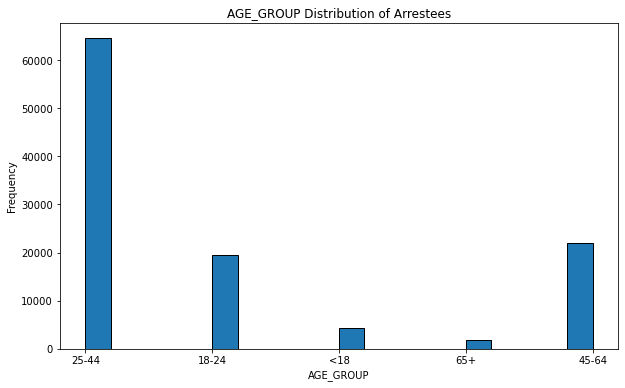

In [93]:
# # Identify outliers
plt.figure(figsize=(10, 6))
plt.hist(df['AGE_GROUP'],edgecolor='black', bins=20)
plt.xlabel('AGE_GROUP')
plt.ylabel('Frequency')
plt.title('AGE_GROUP Distribution of Arrestees')
plt.show()

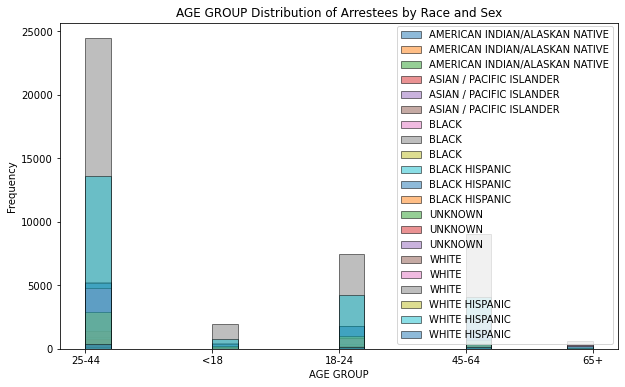

In [94]:
# AGE_GROUP Distribution of Arrestees by Race and Sex
grouped = df.groupby(['PERP_RACE', 'PERP_SEX'])
plt.figure(figsize=(10, 6))
for group, data1 in grouped:
    plt.hist(data1['AGE_GROUP'], bins=20,edgecolor='black', alpha=0.5, label=group)
plt.xlabel('AGE GROUP')
plt.ylabel('Frequency')
plt.title('AGE GROUP Distribution of Arrestees by Race and Sex')
plt.legend()
plt.show()
    

In [95]:
# add additional calculated column to calculate the yearwise arrest data
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])  # Convert the column to datetime if not already done

# Extract the year from the datetime column
df['YEAR'] = df['ARREST_DATE'].dt.year
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,YEAR
0,263238742,2023-02-08,380.0,"ROBBERY,CAR JACKING",105.0,ROBBERY,PL 1601003,F,K,62,0,25-44,F,WHITE,989904,156928,40.597407,-73.979638,POINT (-73.979638 40.597407),2023
1,265590985,2023-03-24,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,S,120,0,18-24,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691),2023
2,265798132,2023-03-28,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,0,25-44,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691),2023
3,269233687,2023-06-02,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,110,0,25-44,M,WHITE HISPANIC,1019164,210169,40.743481,-73.874004,POINT (-73.8740035373971 40.7434812638841),2023
4,270519574,2023-06-28,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK HISPANIC,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238),2023


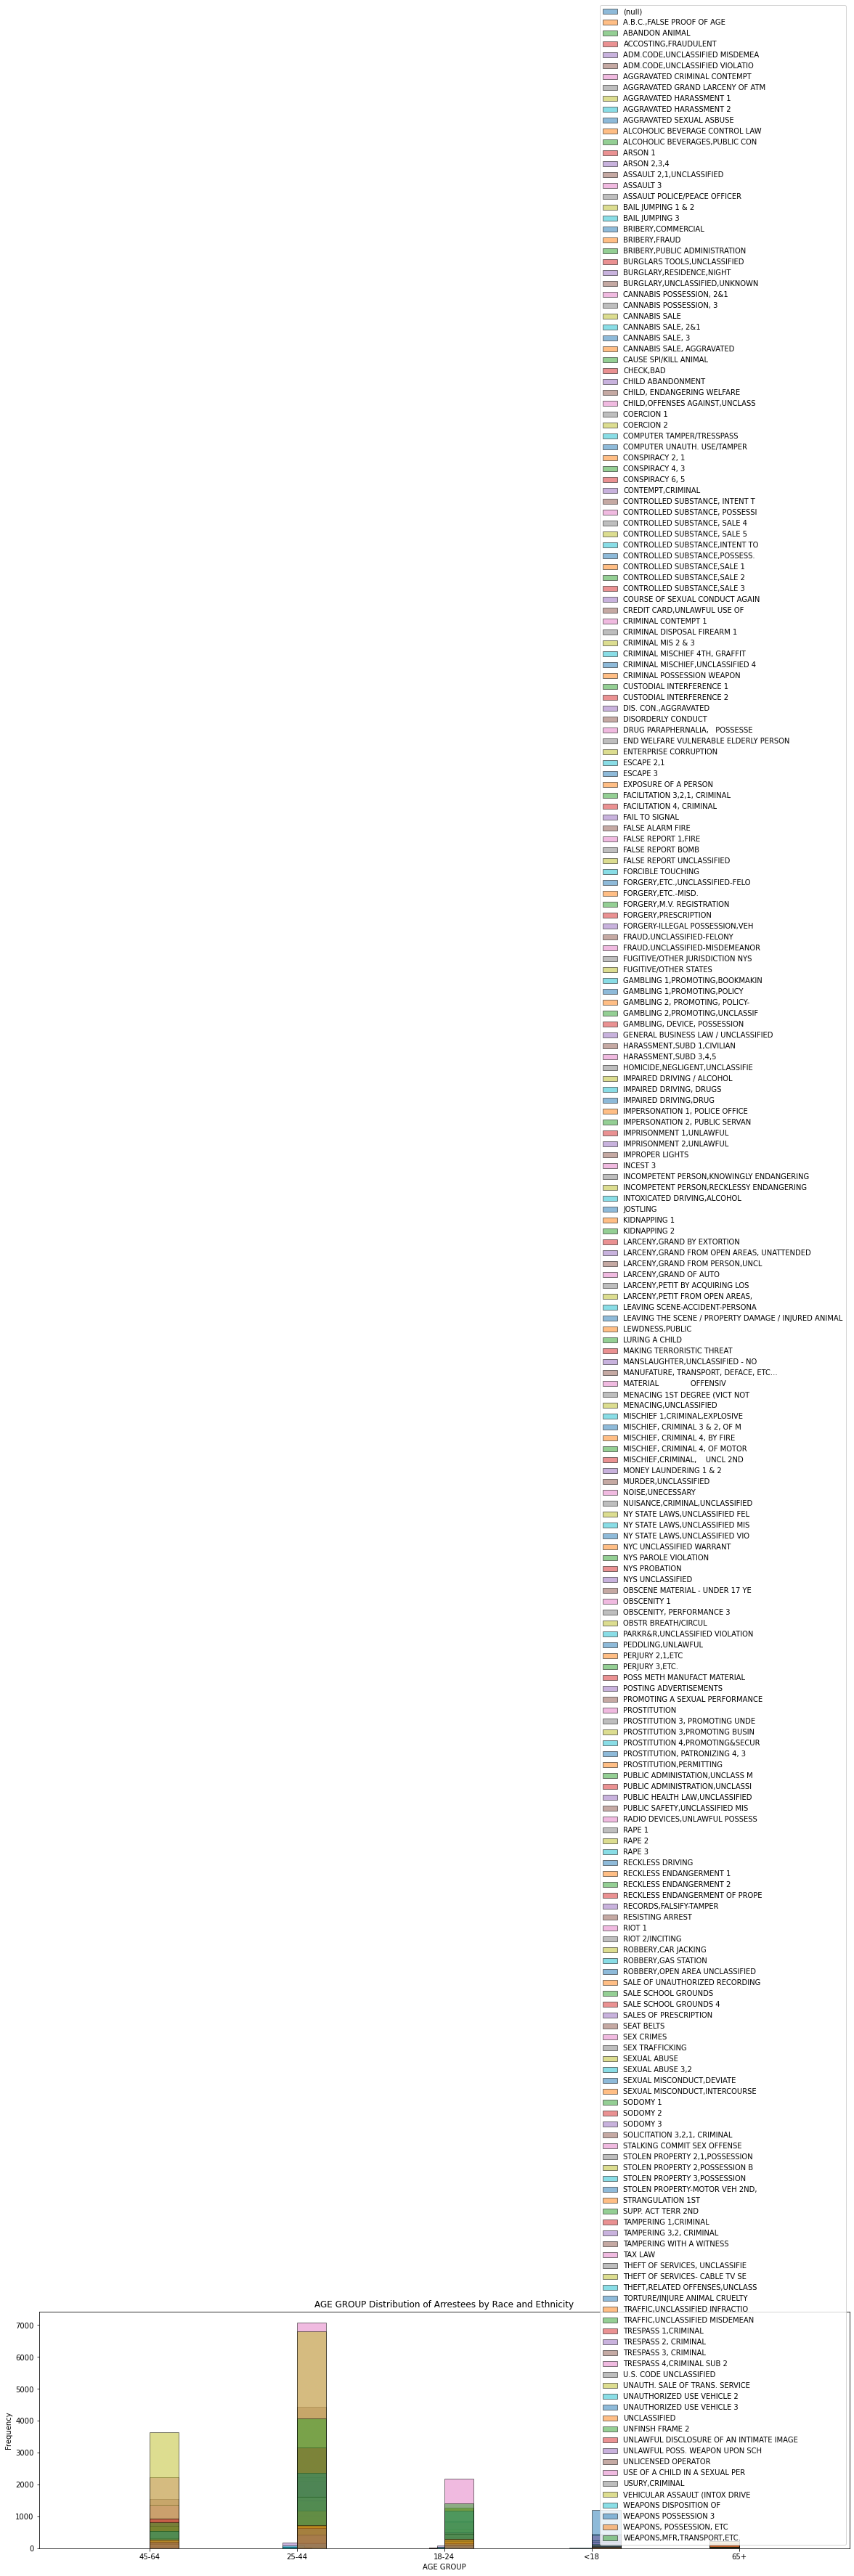

In [96]:
# Age Distribution of Arrestees TYPE
grouped = df.groupby(['PD_DESC'])
plt.figure(figsize=(20, 6))
for group, data1 in grouped:
    plt.hist(data1['AGE_GROUP'], bins=20,edgecolor='black', alpha=0.5, label=group)
plt.xlabel('AGE GROUP')
plt.ylabel('Frequency')
plt.title('AGE GROUP Distribution of Arrestees by Race and Ethnicity')
plt.legend()
plt.show()

In [97]:
## --> From the above plots we can say that above 65+  years person arrest records are minimal but we cannot ignore 
##   as it may be significant. So considering there is no outlier


In [98]:
# Fix casing or inconsistent values
# Convert all values in the 'Name' column to lowercase
# Capitalize the first letter of each value in the 'Name' column
df['PD_DESC'] = df['PD_DESC'].str.capitalize()

#df

In [99]:
# Now get distnct offense type for the column_name =OFNS_DESC
distinct_values = df['OFNS_DESC'].unique()
# Print distinct values
print(distinct_values)


['ROBBERY' 'RAPE' 'FELONY ASSAULT' 'ARSON' 'SEX CRIMES' 'JOSTLING'
 '(null)' 'BURGLARY' "BURGLAR'S TOOLS" 'DANGEROUS WEAPONS'
 'OTHER OFFENSES RELATED TO THEF' 'CRIMINAL MISCHIEF & RELATED OF'
 'OFF. AGNST PUB ORD SENSBLTY &' 'POSSESSION OF STOLEN PROPERTY'
 'VEHICLE AND TRAFFIC LAWS' 'CRIMINAL TRESPASS' 'PETIT LARCENY'
 'MISCELLANEOUS PENAL LAW' 'DANGEROUS DRUGS'
 'MURDER & NON-NEGL. MANSLAUGHTE' 'ASSAULT 3 & RELATED OFFENSES'
 'OFFENSES INVOLVING FRAUD' 'OTHER TRAFFIC INFRACTION' 'GRAND LARCENY'
 'INTOXICATED & IMPAIRED DRIVING' 'FORGERY'
 'OFFENSES AGAINST PUBLIC ADMINI' 'PROSTITUTION & RELATED OFFENSES'
 'GRAND LARCENY OF MOTOR VEHICLE' 'NYS LAWS-UNCLASSIFIED FELONY'
 'OTHER STATE LAWS (NON PENAL LA' 'OFFENSES AGAINST THE PERSON'
 'FOR OTHER AUTHORITIES' 'UNAUTHORIZED USE OF A VEHICLE'
 'ALCOHOLIC BEVERAGE CONTROL LAW' 'ENDAN WELFARE INCOMP' 'FRAUDS'
 'OFFENSES AGAINST PUBLIC SAFETY' 'INTOXICATED/IMPAIRED DRIVING'
 'ANTICIPATORY OFFENSES' 'OTHER STATE LAWS' 'ADMINISTRATIVE CODE'
 '

In [100]:
## Now we are going to analyze the data for 'CANNABIS RELATED OFFENSES'
filtered_df = df[df['OFNS_DESC'] == 'CANNABIS RELATED OFFENSES']

# Print the filtered DataFrame
filtered_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,YEAR
1023,263379671,2023-02-10,581.0,"Cannabis sale, 3",250.0,CANNABIS RELATED OFFENSES,PL 2225001,M,M,28,0,25-44,M,BLACK,997602,230430,40.799146,-73.951772,POINT (-73.951772 40.799146),2023
3861,269916996,2023-06-15,581.0,"Cannabis sale, 3",250.0,CANNABIS RELATED OFFENSES,PL 2225001,M,Q,110,0,25-44,M,ASIAN / PACIFIC ISLANDER,1016572,210045,40.743143,-73.883354,POINT (-73.883354 40.743143),2023
5192,262995087,2023-02-03,578.0,"Cannabis possession, 3",250.0,CANNABIS RELATED OFFENSES,PL 2223001,M,Q,102,0,18-24,M,WHITE HISPANIC,1029403,193205,40.696865,-73.837165,POINT (-73.83716543 40.69686463),2023
6272,266657456,2023-04-13,578.0,"Cannabis possession, 3",250.0,CANNABIS RELATED OFFENSES,PL 2223001,M,M,28,0,18-24,F,WHITE HISPANIC,999788,233328,40.807094,-73.943873,POINT (-73.943873 40.807094),2023
6748,262846810,2023-02-01,579.0,"Cannabis possession, 2&1",250.0,CANNABIS RELATED OFFENSES,PL 2223502,F,Q,103,0,18-24,F,BLACK,1040224,191374,40.691777,-73.798154,POINT (-73.798154 40.691777),2023


In [102]:
filtered_df.shape
# No of rows : 126 and Number of columns : 20 which is very minimal compare to the total arrest 112110

(126, 20)

In [ ]:
 # Conduct Fuzzy Matching
## conduct Fuzzy search to find out the PD_DESC='CANNABIS SALE'
# Target address to match
target_address = 'CANNABIS SALE'
# Calculate similarity scores for each address in the DataFrame
df['Similarity Score'] = df['PD_DESC'].apply(lambda x: fuzz.ratio(target_address.lower(), x.lower()))
# Find the best match and its similarity score
best_match = process.extractOne(target_address.lower(), df['PD_DESC'].apply(lambda x: x.lower()))
best_match_address = best_match[0]
best_match_score = best_match[1]
# Print the DataFrame and the best match
print("DataFrame:")
#print(data)
print("\nBest Match:")
print(f"Address: {best_match_address}")
print(f"Similarity Score: {best_match_score}")